In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("tdd_bdd_comparison_dataset.csv") #Load Dataset from the CSV file
print("Loaded Dataset:") # Display the first few rows of the dataset
print(data.head())

Loaded Dataset:
  Methodology        Project  Bugs_Detected_Development  \
0         TDD  TDD_Project_1                         26   
1         TDD  TDD_Project_2                         39   
2         TDD  TDD_Project_3                         34   
3         TDD  TDD_Project_4                         30   
4         TDD  TDD_Project_5                         27   

   Bugs_Detected_Production  Test_Coverage_Percentage  Development_Time_Hours  \
0                        12                     75.01                     770   
1                        12                     89.88                     689   
2                         7                     84.26                     945   
3                        10                     84.17                     674   
4                         9                     75.11                     945   

   Team_Size  
0          3  
1          5  
2          7  
3          5  
4          7  


In [3]:
print("\nMissing Values:") 
print(data.isnull().sum())

print("\nSummary Statistics:")
print(data.describe())


Missing Values:
Methodology                  0
Project                      0
Bugs_Detected_Development    0
Bugs_Detected_Production     0
Test_Coverage_Percentage     0
Development_Time_Hours       0
Team_Size                    0
dtype: int64

Summary Statistics:
       Bugs_Detected_Development  Bugs_Detected_Production  \
count                  20.000000                 20.000000   
mean                   26.300000                  9.650000   
std                     6.391606                  4.042862   
min                    16.000000                  3.000000   
25%                    23.000000                  6.000000   
50%                    26.000000                 10.000000   
75%                    30.000000                 12.000000   
max                    39.000000                 18.000000   

       Test_Coverage_Percentage  Development_Time_Hours  Team_Size  
count                 20.000000                20.00000  20.000000  
mean                  85.644500    

In [4]:
if 'Total_Bugs_Detected' not in data.columns:     #Create additional metrics
    data['Total_Bugs_Detected'] = data['Bugs_Detected_Development'] + data['Bugs_Detected_Production']
    data['Bug_Detection_Rate_Development'] = (data['Bugs_Detected_Development'] / data['Total_Bugs_Detected']) * 100
    data['Bug_Detection_Rate_Production'] = (data['Bugs_Detected_Production'] / data['Total_Bugs_Detected']) * 100

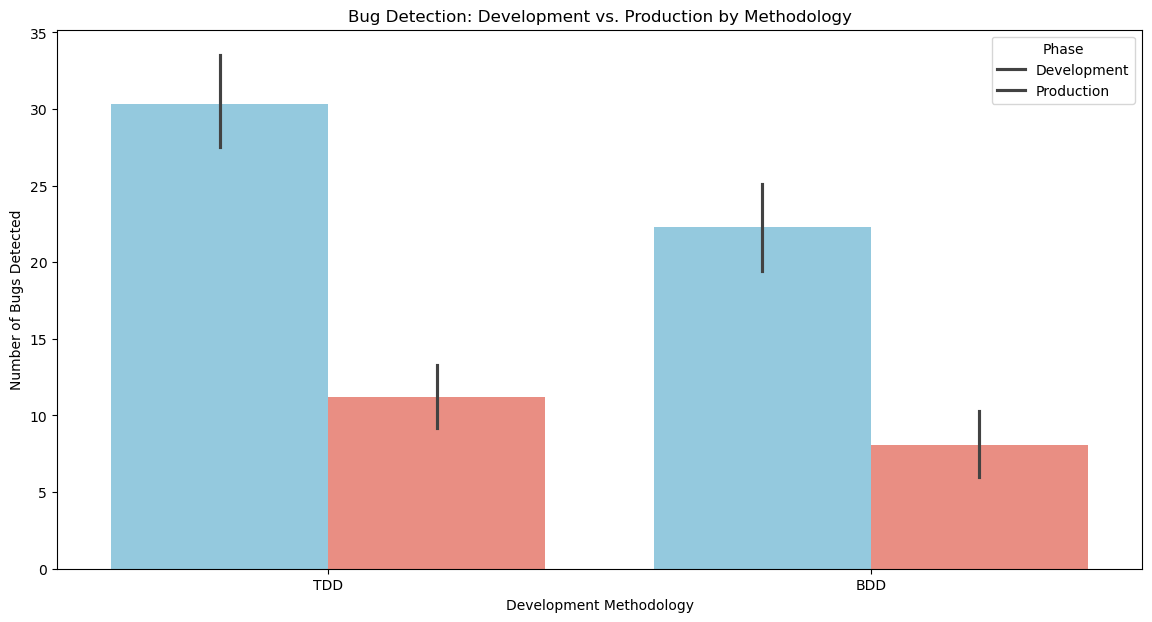

In [5]:
plt.figure(figsize=(14, 7))
data_melted = data.melt(
    id_vars=['Methodology', 'Project'],
    value_vars=['Bugs_Detected_Development', 'Bugs_Detected_Production'],
    var_name='Phase',
    value_name='Bug_Count'
)
sns.barplot(
    x='Methodology', y='Bug_Count', hue='Phase', data=data_melted,
    palette={'Bugs_Detected_Development': 'skyblue', 'Bugs_Detected_Production': 'salmon'}
)
plt.title('Bug Detection: Development vs. Production by Methodology')
plt.xlabel('Development Methodology')
plt.ylabel('Number of Bugs Detected')
plt.legend(title='Phase', labels=['Development', 'Production'])
plt.show()

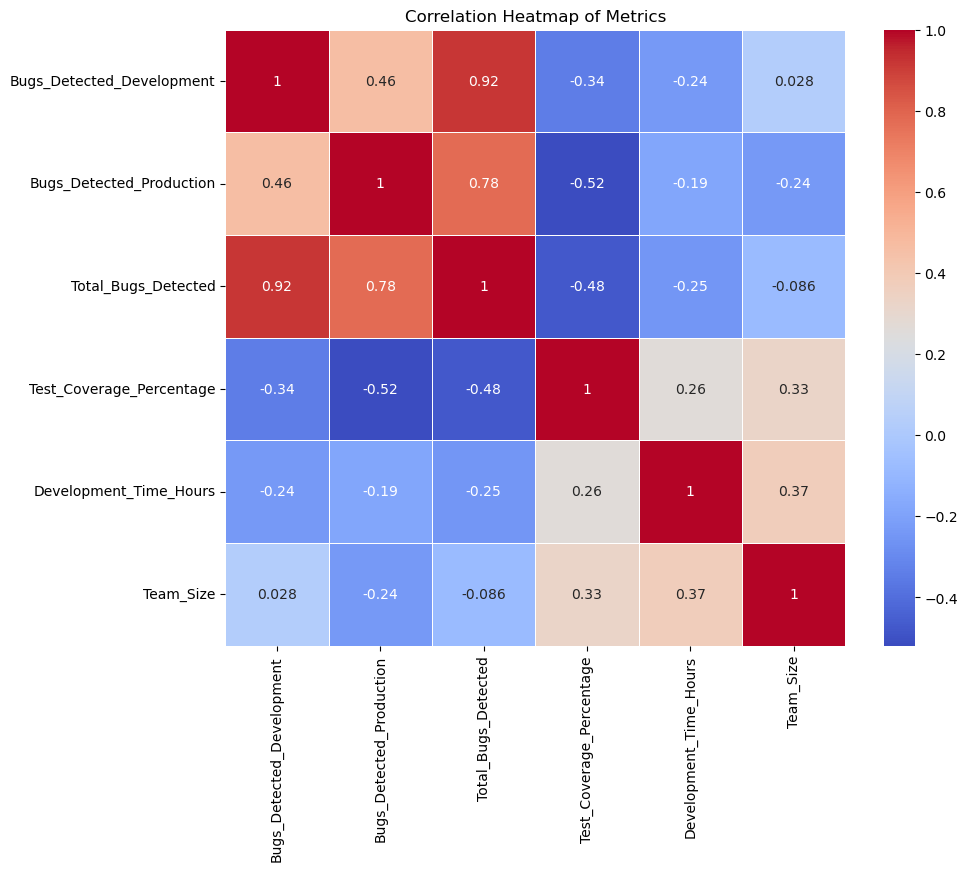

In [6]:
plt.figure(figsize=(10, 8)) #n
corr = data[['Bugs_Detected_Development', 'Bugs_Detected_Production',
             'Total_Bugs_Detected', 'Test_Coverage_Percentage',
             'Development_Time_Hours', 'Team_Size']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Metrics')
plt.show()

In [7]:
X = data[['Test_Coverage_Percentage', 'Development_Time_Hours', 'Team_Size']]
y = data['Methodology']  # Ensure Methodology is encoded numerically if categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


C:\Users\miccaela castisimo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


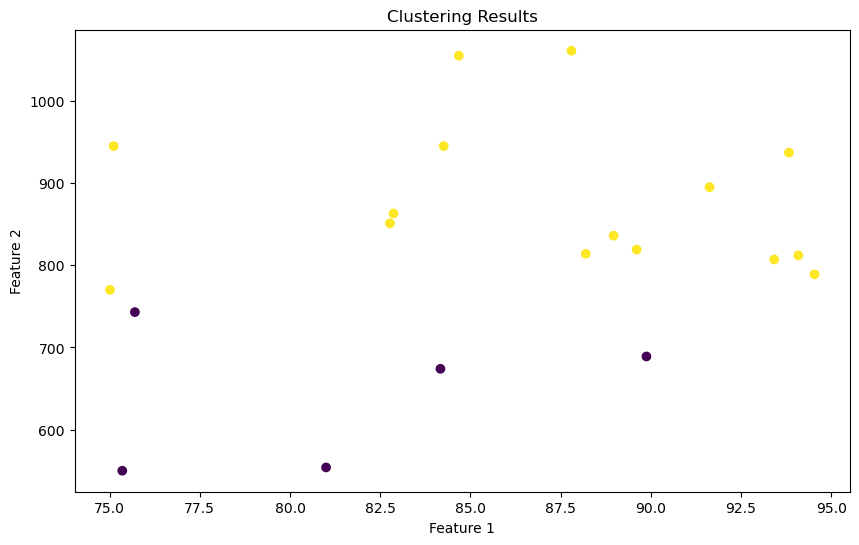

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)  # Choose an appropriate number of clusters
kmeans.fit(X)
labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.title('Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [9]:
print("Summary Statistics by Methodology:") # Display Summary Statistics
print(data.groupby('Methodology').agg({
    'Bugs_Detected_Development': ['mean', 'std'],
    'Bugs_Detected_Production': ['mean', 'std'],
    'Test_Coverage_Percentage': ['mean', 'std'],
    'Development_Time_Hours': ['mean', 'std']
}).round(2))

Summary Statistics by Methodology:
            Bugs_Detected_Development       Bugs_Detected_Production        \
                                 mean   std                     mean   std   
Methodology                                                                  
BDD                              22.3  4.79                      8.1  3.93   
TDD                              30.3  5.27                     11.2  3.71   

            Test_Coverage_Percentage       Development_Time_Hours          
                                mean   std                   mean     std  
Methodology                                                                
BDD                            89.99  4.16                  885.7  101.05  
TDD                            81.30  5.84                  755.2  142.08  
